In [18]:
# SVM Model with GridSearchCV Tuning -- reduced features

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
# df = pd.read_csv("exoplanet_data.csv")
df = pd.read_csv("./Resources1/claims_accident_pgsql.csv")
# Drop the null columns where all values are null
df1 = df.dropna(axis='columns', how='all')
# Drop the null rows
# df = df.dropna()
df.head()

,age,auto_year,incident_hour_of_the_day,number_of_vehicles_involved,visibility,temperature,humidity,wind_speed,precipitation
0,48,2004,5,1,10.0,76.0,62.0,3.0,0.0
1,42,2007,8,1,10.0,51.0,80.0,6.0,0.0
2,29,2007,7,3,10.0,53.6,16.0,4.6,NaN
3,41,2014,5,1,10.0,84.2,84.0,13.8,NaN
4,44,2009,20,1,10.0,73.4,33.0,6.9,NaN


In [21]:
df.columns

Index(['age', 'auto_year', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'visibility', 'temperature', 'humidity',
       'wind_speed', 'precipitation'],
      dtype='object')

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          999 non-null    int64  
 1   auto_year                    999 non-null    int64  
 2   incident_hour_of_the_day     999 non-null    int64  
 3   number_of_vehicles_involved  999 non-null    int64  
 4   visibility                   980 non-null    float64
 5   temperature                  983 non-null    float64
 6   humidity                     983 non-null    float64
 7   wind_speed                   903 non-null    float64
 8   precipitation                562 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 70.4 KB
None


In [23]:
claim_param = pd.read_csv("./Resources/insurance_claims.csv", names = ['age', 'insured_sex', 'incident_location', 'incident_hour_of_the_day', 'policy_number', 'policy_state', 'auto_make', 'auto_model', 'auto_year','total_claim_amount'])
# DataFrame with new columns
print(claim_param.columns)

Index(['age', 'insured_sex', 'incident_location', 'incident_hour_of_the_day',
       'policy_number', 'policy_state', 'auto_make', 'auto_model', 'auto_year',
       'total_claim_amount'],
      dtype='object')


In [24]:
# claim_param1 = pd.read_csv("./Resources/insurance_claims.csv", usecols=['age', 'insured_sex','policy_number', 'policy_state', 'auto_make', 'auto_model', 'auto_year', 'total_claim_amount', 'incident_severity'], nrows=20, index_col='policy_number')
# print(claim_param1)

Select your features (columns)

In [25]:
# Set features. Will also be used as x values.
training_selected_features = df[['age',	'auto_year', 'incident_hour_of_the_day',	'number_of_vehicles_involved',	'visibility',	'temperature',	'humidity',	'wind_speed',	'precipitation']].dropna()
training_selected_features

,age,auto_year,incident_hour_of_the_day,number_of_vehicles_involved,visibility,temperature,humidity,wind_speed,precipitation
0,48,2004,5,1,10.0,76.0,62.0,3.0,0.0
1,42,2007,8,1,10.0,51.0,80.0,6.0,0.0
5,39,2003,19,3,2.0,28.0,88.0,3.0,0.0
6,34,2012,0,3,10.0,55.0,40.0,5.0,0.0
8,33,2012,21,1,5.0,57.0,77.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...
990,43,2013,18,1,10.0,79.0,54.0,9.0,0.0
993,28,2012,20,3,10.0,38.0,86.0,0.0,0.0
994,30,1996,6,1,4.0,19.0,92.0,9.2,0.0
997,34,1996,4,3,10.0,67.0,61.0,7.0,0.0


Create a Train Test Split
Use koi_disposition for the y values

In [26]:
X = training_selected_features
y = training_selected_features['auto_year']
print(X.shape, y.shape)

(549, 9) (549,)


In [27]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Pre-processing
Scale the data using the MinMaxScaler and perform some feature selection

In [28]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

Training the Model¶

In [29]:
# pport vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')

# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train_minmax, y_train)

training_score = model.score(X_train_minmax, y_train)
testing_score = model.score(X_test_minmax, y_test)

In [30]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [31]:
print(f"Training Data Score: {training_score}")
print(f"Testing Data Score: {testing_score}")

Training Data Score: 0.36009732360097324
Testing Data Score: 0.2318840579710145


Hyperparameter Tuning
Use GridSearchCV to tune the model's parameters

In [32]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [33]:
# Train the model with GridSearch
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train_minmax, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 2/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 3/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 4/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 5/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 1/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 2/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 3/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 4/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 5/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 1/5] END ...............................C=1, gamma=0.001; total time=   0.0s
[CV 2/5] END ...............................C=1,

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [34]:
# Single best score achieved across all params (k)
print(grid.best_score_)
# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)


0.7224507787246548
{'C': 50, 'gamma': 0.0001}
SVC(C=50, gamma=0.0001, kernel='linear')


In [35]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_minmax)

In [36]:
print('Test Acc: %.3f' % grid.score(X_test_minmax, y_test))

Test Acc: 0.913


In [37]:
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test.tolist()}).reset_index(drop=True)
results

,Prediction,Actual
0,1997,1997
1,2012,2012
2,2007,2006
3,2002,2002
4,2000,2000
...,...,...
133,2005,2005
134,2008,2008
135,2015,2015
136,2010,2010


In [38]:
results.head(10)

,Prediction,Actual
0,1997,1997
1,2012,2012
2,2007,2006
3,2002,2002
4,2000,2000
5,2002,2002
6,2013,2013
7,1999,2000
8,2011,2011
9,1995,1995


In [39]:
results.tail(10)

,Prediction,Actual
128,2004,2004
129,1997,1997
130,1997,1997
131,2004,2004
132,2010,2010
133,2005,2005
134,2008,2008
135,2015,2015
136,2010,2010
137,2005,2005


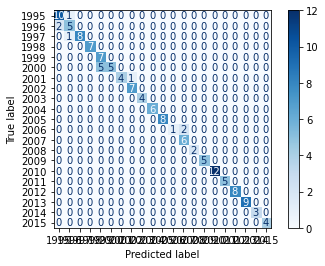

In [40]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid, X_test_minmax, y_test, cmap="Blues")
plt.show()

In [41]:
# from sklearn.metrics import target_names=["CAport classification_report
# print(classification_report(y_test, predictions,
#                        "CANDIDATE", "CONFIRMED", "FALSE POSITIVE"]))

Saving the Model

In [42]:
# save model by updating "your_name" with Adebayo
# and "your_model" with your model variable
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Adebayo_SVM2.sav'
joblib.dump(model, filename)

['Adebayo_SVM2.sav']